In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the dataset and review the output

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [3]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


We have 212331 rows and 14 columns of data, but a lot of rows and columns have missing values and needs to be cleaned up. I am removing columns "Number Scoring CR" and "Percent Scoring CR" since all values in them are "na".

In [4]:
drop_cols=['Number Scoring CR', 'Percent Scoring CR']
df.drop(drop_cols, inplace=True, axis=1)

In [5]:
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s


I am also removing any rows where "Total Tested" is less than 20 since low number of tests cannot provide statistically significant information when it comes to comparing schools.

In [6]:
df1 = df[df['Total Tested'] > 20]
df1

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0,0,51,100,44,86.3
11,01M184,P.S. 184m Shuang Wen,K-8,Living Environment,2017,55,83.9,1,1.8,54,98.2,43,78.2
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14,60.9,9,39.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212295,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2015,44,84.8,1,2.3,43,97.7,34,77.3
212296,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2016,21,s,s,s,s,s,s,s
212297,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2016,55,83.7,4,7.3,51,92.7,39,70.9
212299,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2017,22,s,s,s,s,s,s,s


I have noticed that some of the rows in "Mean Score" column have a value of "s". In those rows, there are also values "s" in columns "Number Scoring Below 65", "Percent Scoring Below 65",	"Number Scoring 65 or Above",	"Percent Scoring 65 or Above",	"Number Scoring 80 or Above",	"Percent Scoring 80 or Above". I have theorized that ALL rows that have "s" in the "Mean Score" column, also have "s" in the above listed columns. To test this theory, I have run a statement that lists 50 rows with "s" in the "Mean Score" column.

In [7]:
options = ['s']
df2 = df1.loc[df1['Mean Score'].isin(options)]
df2.head(50)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
1994,01M650,Cascades High School,High school,English,2015,84,s,s,s,s,s,s,s
3053,01M650,Cascades High School,High school,English,2016,21,s,s,s,s,s,s,s
6812,08X507,Stevenson Yabc,High school,Common Core English,2016,22,s,s,s,s,s,s,s
7718,08X507,Stevenson Yabc,High school,English,2015,39,s,s,s,s,s,s,s
14051,17K467,Erasmus Yabc,High school,English,2015,49,s,s,s,s,s,s,s
15118,17K467,Erasmus Yabc,High school,English,2016,34,s,s,s,s,s,s,s
16886,25Q467,Flushing Yabc,High school,English,2016,32,s,s,s,s,s,s,s
19211,12X478,The Cinema School,High school,English,2015,30,s,s,s,s,s,s,s
19489,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,47,s,s,s,s,s,s,s
19491,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,46,s,s,s,s,s,s,s


As my theory confirmed, the rows with "s" in the "Mean Score" column, also have "s" in the above listed columns. S is not valuable for our statistical purposes and all such rows need to be taken out of our dataframe.

In [8]:
options = ['s']
df2 = df1.loc[~df1['Mean Score'].isin(options)]
df2

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0,0,51,100,44,86.3
11,01M184,P.S. 184m Shuang Wen,K-8,Living Environment,2017,55,83.9,1,1.8,54,98.2,43,78.2
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14,60.9,9,39.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212293,84X704,KIPP Academy Charter School,K-12 all grades,Physical Settings/Physics,2017,36,66.2,17,47.2,19,52.8,7,19.4
212294,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2015,24,80.8,0,0,24,100,14,58.3
212295,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2015,44,84.8,1,2.3,43,97.7,34,77.3
212297,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2016,55,83.7,4,7.3,51,92.7,39,70.9


Checking if any values in the resulting dataframe are null or missing:

In [9]:
df2.isnull().sum()

School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   6
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
dtype: int64

It appears that out of 97084 rows, there are only 6 rows that are missing values in column Regents Exam, which describes the type of exam taken. Dropping the missing values:

In [10]:
df2.dropna(axis=0)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0,0,51,100,44,86.3
11,01M184,P.S. 184m Shuang Wen,K-8,Living Environment,2017,55,83.9,1,1.8,54,98.2,43,78.2
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14,60.9,9,39.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212293,84X704,KIPP Academy Charter School,K-12 all grades,Physical Settings/Physics,2017,36,66.2,17,47.2,19,52.8,7,19.4
212294,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2015,24,80.8,0,0,24,100,14,58.3
212295,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2015,44,84.8,1,2.3,43,97.7,34,77.3
212297,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2016,55,83.7,4,7.3,51,92.7,39,70.9


The data also appears to be in strings format and we need it in numbers/integer format in order to do statistical analysis. Convert data into number/integer format:

In [11]:
df3 = df2.copy()
df3['Year'] = pd.to_numeric(df3['Year'])
df3['Total Tested'] = pd.to_numeric(df3['Total Tested'])
df3['Mean Score'] = pd.to_numeric(df3['Mean Score'])
df3['Number Scoring Below 65'] = pd.to_numeric(df3['Number Scoring Below 65'])
df3['Percent Scoring Below 65'] = pd.to_numeric(df3['Percent Scoring Below 65'])
df3['Number Scoring 65 or Above'] = pd.to_numeric(df3['Number Scoring 65 or Above'])
df3['Percent Scoring 65 or Above'] = pd.to_numeric(df3['Percent Scoring 65 or Above'])
df3['Number Scoring 80 or Above'] = pd.to_numeric(df3['Number Scoring 80 or Above'])
df3['Percent Scoring 80 or Above'] = pd.to_numeric(df3['Percent Scoring 80 or Above'])
df3

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2.0,48,98.0,23,46.9
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9,17.6,42,82.4,33,64.7
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0,0.0,51,100.0,44,86.3
11,01M184,P.S. 184m Shuang Wen,K-8,Living Environment,2017,55,83.9,1,1.8,54,98.2,43,78.2
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14,60.9,9,39.1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212293,84X704,KIPP Academy Charter School,K-12 all grades,Physical Settings/Physics,2017,36,66.2,17,47.2,19,52.8,7,19.4
212294,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2015,24,80.8,0,0.0,24,100.0,14,58.3
212295,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2015,44,84.8,1,2.3,43,97.7,34,77.3
212297,84X704,KIPP Academy Charter School,K-12 all grades,U.S. History and Government,2016,55,83.7,4,7.3,51,92.7,39,70.9


Now that the data is cleaned up, its time to analyze it. I am interested in Fort Hamilton High School and how its average Regents scores compare to other schools in same borough of Brooklyn and across all of NY schools. The Fort Hamilton High School's DBN is 20K490. I am going to rename the subset dataframes after the school or region.


Average Regents scores across all of NY schools:

In [12]:
dfNYSchools = df3.groupby(['Regents Exam'])['Mean Score'].mean()
dfNYSchools

Regents Exam
Algebra2/Trigonometry              59.254412
Common Core Algebra                67.284748
Common Core Algebra2               65.308347
Common Core English                71.588156
Common Core Geometry               60.230096
English                            67.901688
Geometry                           63.729122
Global History and Geography       64.531601
Integrated Algebra                 65.206123
Living Environment                 69.171097
Physical Settings/Chemistry        66.035279
Physical Settings/Earth Science    64.500465
Physical Settings/Physics          69.353948
U.S. History and Government        71.935296
Name: Mean Score, dtype: float64

Listing out what time period these scores cover, as well as scores range:

In [13]:
df3['Year'].min()

2015

In [14]:
df3['Year'].max()

2017

In [15]:
df3['Mean Score'].min()

15.7

In [16]:
df3['Mean Score'].max()

98.5

Text(0.5, 1.0, 'Average Regents Scores for all NY Schools for Years 2015-2017')

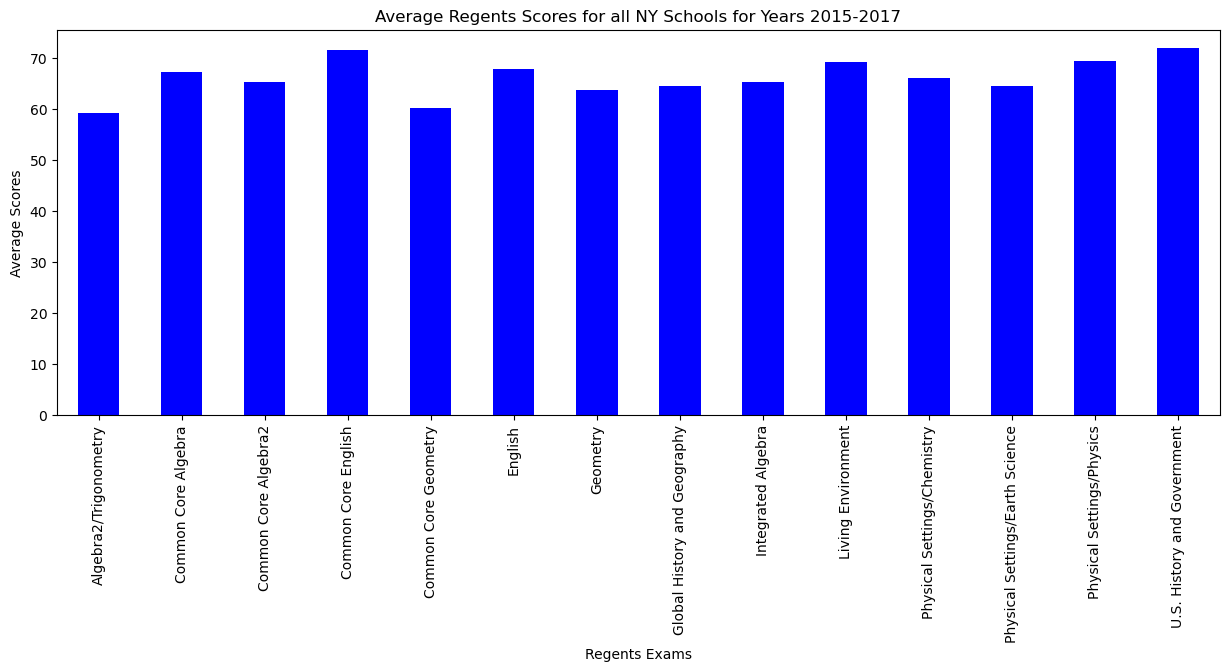

In [17]:
plt.rcParams['figure.figsize'] = (15,5)
dfNYSchools.plot.bar(x = 'Regents Exam', y = 'Mean Score', color='blue', fontsize= 10)
plt.xlabel ('Regents Exams')
plt.ylabel ('Average Scores')
plt.title ("Average Regents Scores for all NY Schools for Years 2015-2017")

Schools in Brooklyn Borough are identified by letter "K" in their DBN. Create a dataframe of scores just for Brooklyn Borough and run the same statistics as above:

In [18]:
df4 = df3[df3['School DBN'].str.contains('K')]
df4

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
8401,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2016,26,80.0,1,3.8,25,96.2,13,50.0
8402,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2017,70,75.0,7,10.0,63,90.0,26,37.1
8405,13K008,P.S. 008 Robert Fulton,K-8,Living Environment,2017,59,76.8,12,20.3,47,79.7,27,45.8
8406,13K113,M.S. 113 Ronald Edmonds Learning Center,Junior High-Intermediate-Middle,Common Core Algebra,2015,82,66.1,26,31.7,56,68.3,3,3.7
8407,13K113,M.S. 113 Ronald Edmonds Learning Center,Junior High-Intermediate-Middle,Common Core Algebra,2016,47,72.7,8,17.0,39,83.0,12,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208968,84K780,Brooklyn East Collegiate Charter School,Junior High-Intermediate-Middle,Living Environment,2016,54,78.0,0,0.0,54,100.0,20,37.0
208972,84K780,Brooklyn East Collegiate Charter School,Junior High-Intermediate-Middle,Living Environment,2017,62,75.2,8,12.9,54,87.1,21,33.9
208998,84K803,Brooklyn LAB Charter School,Junior High-Intermediate-Middle,Common Core Algebra,2017,30,73.0,4,13.3,26,86.7,8,26.7
209003,84K803,Brooklyn LAB Charter School,Junior High-Intermediate-Middle,Living Environment,2017,69,73.7,13,18.8,56,81.2,22,31.9


Average Regents scores across Brooklyn Borough schools:

In [19]:
dfBrooklyn = df4.groupby(['Regents Exam'])['Mean Score'].mean()
dfBrooklyn

Regents Exam
Algebra2/Trigonometry              56.850132
Common Core Algebra                66.568894
Common Core Algebra2               64.664026
Common Core English                70.005860
Common Core Geometry               58.522020
English                            66.333417
Geometry                           62.800290
Global History and Geography       62.975759
Integrated Algebra                 64.482230
Living Environment                 68.254990
Physical Settings/Chemistry        64.316519
Physical Settings/Earth Science    63.359501
Physical Settings/Physics          67.955966
U.S. History and Government        69.651978
Name: Mean Score, dtype: float64

In [20]:
df4['Year'].min()

2015

In [21]:
df4['Year'].max()

2017

In [22]:
df4['Mean Score'].min()

15.7

In [23]:
df4['Mean Score'].max()

96.8

Text(0.5, 1.0, 'Average Regents Scores for all NY Schools for Years 2015-2017')

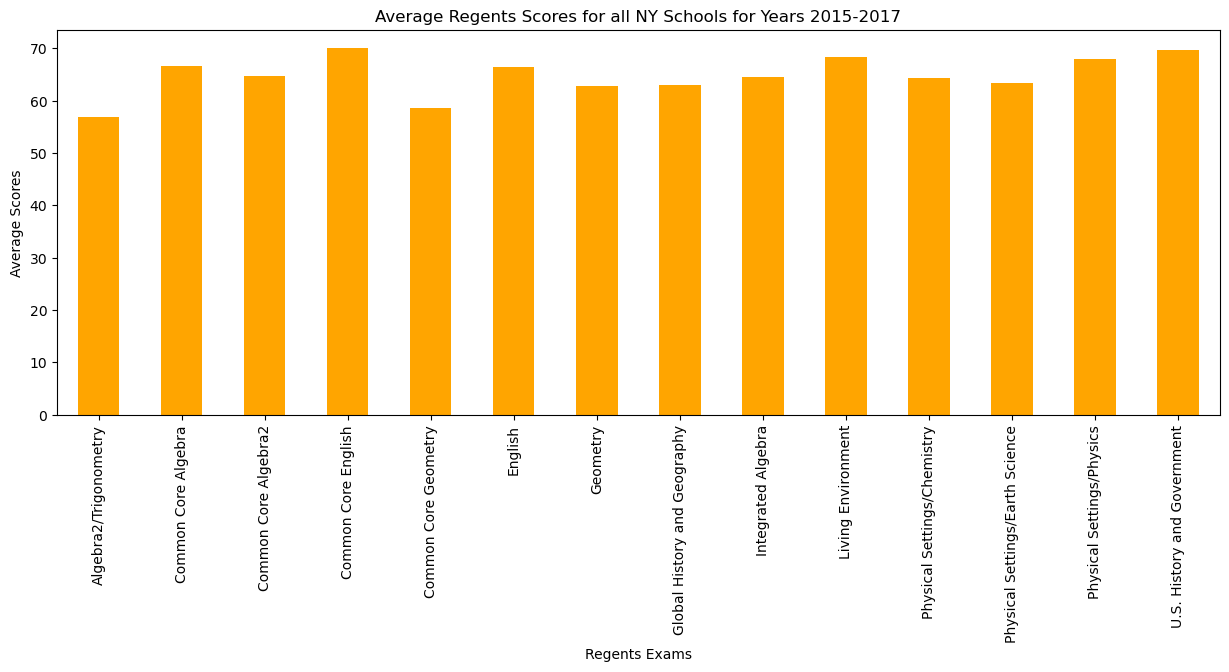

In [24]:
plt.rcParams['figure.figsize'] = (15,5)
dfBrooklyn.plot.bar(x = 'Regents Exam', y = 'Mean Score', color='orange', fontsize= 10)
plt.xlabel ('Regents Exams')
plt.ylabel ('Average Scores')
plt.title ("Average Regents Scores for all NY Schools for Years 2015-2017")

Create a dataframe of scores just for Fort Hamilton High School and run the same statistics as above:

In [25]:
df5 = df4[df4['School Name'].str.contains('Fort Hamilton High School')]
df5

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
12201,20K490,Fort Hamilton High School,High school,Algebra2/Trigonometry,2015,709,67.2,303,42.7,406,57.3,212,29.9
12202,20K490,Fort Hamilton High School,High school,Algebra2/Trigonometry,2016,669,62.2,379,56.7,290,43.3,159,23.8
12203,20K490,Fort Hamilton High School,High school,Common Core Algebra,2015,707,66.0,233,33.0,474,67.0,26,3.7
12204,20K490,Fort Hamilton High School,High school,Common Core Algebra,2016,1248,69.4,364,29.2,884,70.8,232,18.6
12205,20K490,Fort Hamilton High School,High school,Common Core Algebra,2017,1313,71.7,297,22.6,1016,77.4,373,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184714,20K490,Fort Hamilton High School,High school,U.S. History and Government,2017,305,83.8,24,7.9,281,92.1,207,67.9
184715,20K490,Fort Hamilton High School,High school,U.S. History and Government,2017,55,79.0,11,20.0,44,80.0,35,63.6
184716,20K490,Fort Hamilton High School,High school,U.S. History and Government,2017,330,73.3,103,31.2,227,68.8,148,44.8
184717,20K490,Fort Hamilton High School,High school,U.S. History and Government,2017,25,87.7,1,4.0,24,96.0,20,80.0


Average Regents scores for Fort Hamilton High School:

In [26]:
dfFHHS = df5.groupby(['Regents Exam'])['Mean Score'].mean()
dfFHHS

Regents Exam
Algebra2/Trigonometry              64.331818
Common Core Algebra                68.494737
Common Core Algebra2               72.231579
Common Core English                71.678125
Common Core Geometry               67.405556
English                            65.886957
Geometry                           69.900000
Global History and Geography       70.607692
Integrated Algebra                 64.673913
Living Environment                 69.417949
Physical Settings/Chemistry        74.743333
Physical Settings/Earth Science    61.808571
Physical Settings/Physics          81.320000
U.S. History and Government        78.526316
Name: Mean Score, dtype: float64

In [27]:
df5['Year'].min()

2015

In [28]:
df5['Year'].max()

2017

In [29]:
df5['Mean Score'].min()

44.9

In [30]:
df5['Mean Score'].max()

89.4

Text(0.5, 1.0, 'Average Regents Scores for all NY Schools for Years 2015-2017')

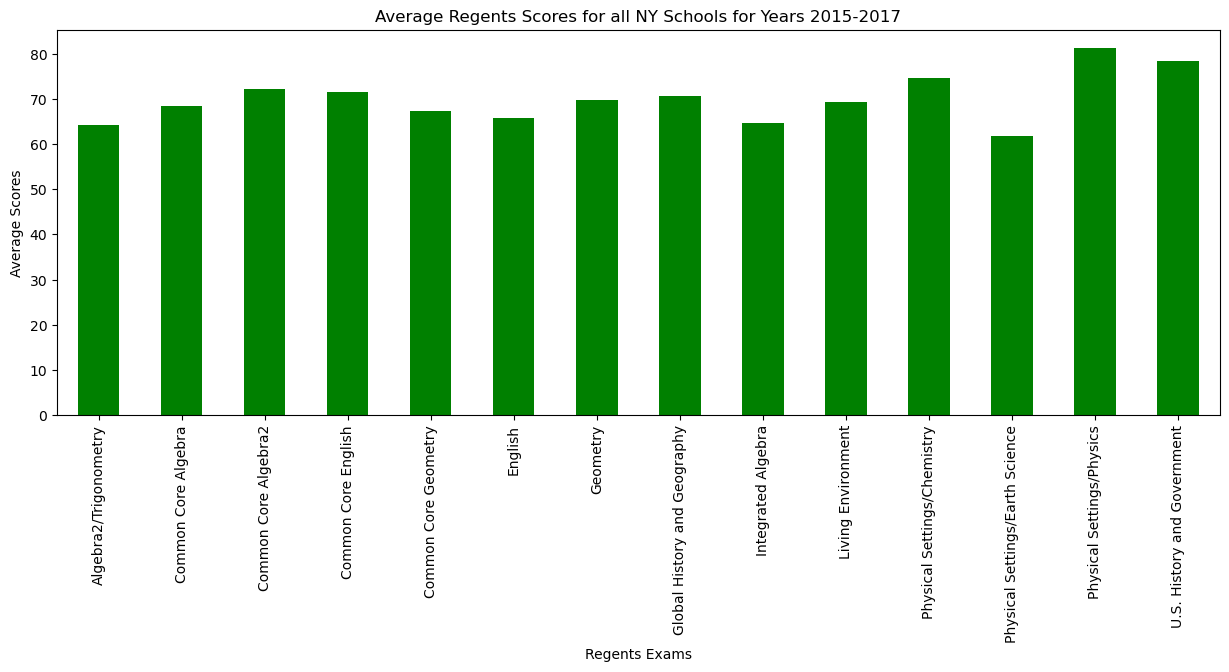

In [31]:
plt.rcParams['figure.figsize'] = (15,5)
dfFHHS.plot.bar(x = 'Regents Exam', y = 'Mean Score', color='green', fontsize= 10)
plt.xlabel ('Regents Exams')
plt.ylabel ('Average Scores')
plt.title ("Average Regents Scores for all NY Schools for Years 2015-2017")

From reviewing above Regents exam average scores, it is evident that overall Brooklyn schools scored lower in almost all Regents exams than average scores across all New York schools. However, Fort Hamilton High School had higher average scores in almost all Regents exam than Brooklyn schools and overall New York schools. Therefore Fort Hamilton High School is on average outperforming other New York schools in terms of scores on Regents Exams. 